# Data vizualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import kagglehub
from kagglehub import KaggleDatasetAdapter


Load data

In [2]:
path = kagglehub.dataset_download("muratkokludataset/dry-bean-dataset")
print("Dataset downloaded to:", path)

Using Colab cache for faster access to the 'dry-bean-dataset' dataset.
Dataset downloaded to: /kaggle/input/dry-bean-dataset


In [3]:
print("Файли в датасеті:", os.listdir(path))

Файли в датасеті: ['Dry_Bean_Dataset']


In [4]:
file_path = os.path.join(path, "Dry_Bean_Dataset/Dry_Bean_Dataset.xlsx")
df = pd.read_excel(file_path)

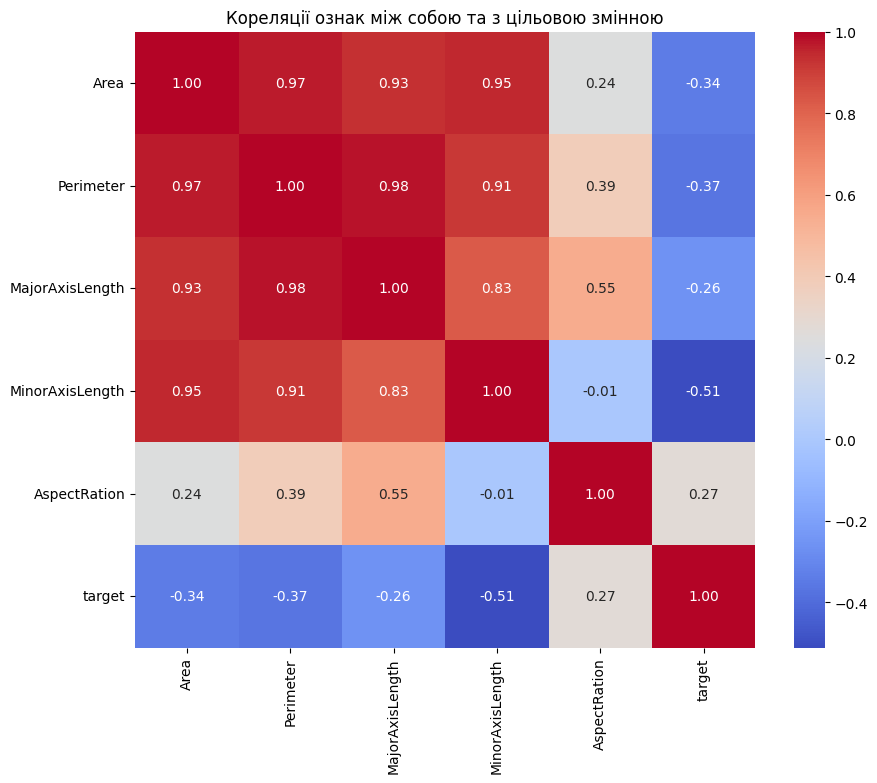

In [9]:
# --- Підготовка для heatmap ---
feature_cols = df.columns[:5]  # перші 5 ознак
target_col = df.columns[-1]    # цільова колонка

# Копія з числовим target для кореляції
df_viz = df[feature_cols].copy()
df_viz['target'] = pd.factorize(df[target_col])[0]  # перетворюємо класи у числа

# --- Heatmap кореляцій ---
plt.figure(figsize=(10,8))
corr = df_viz.corr()  # тепер усі колонки числові
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Кореляції ознак між собою та з цільовою змінною")
plt.show()






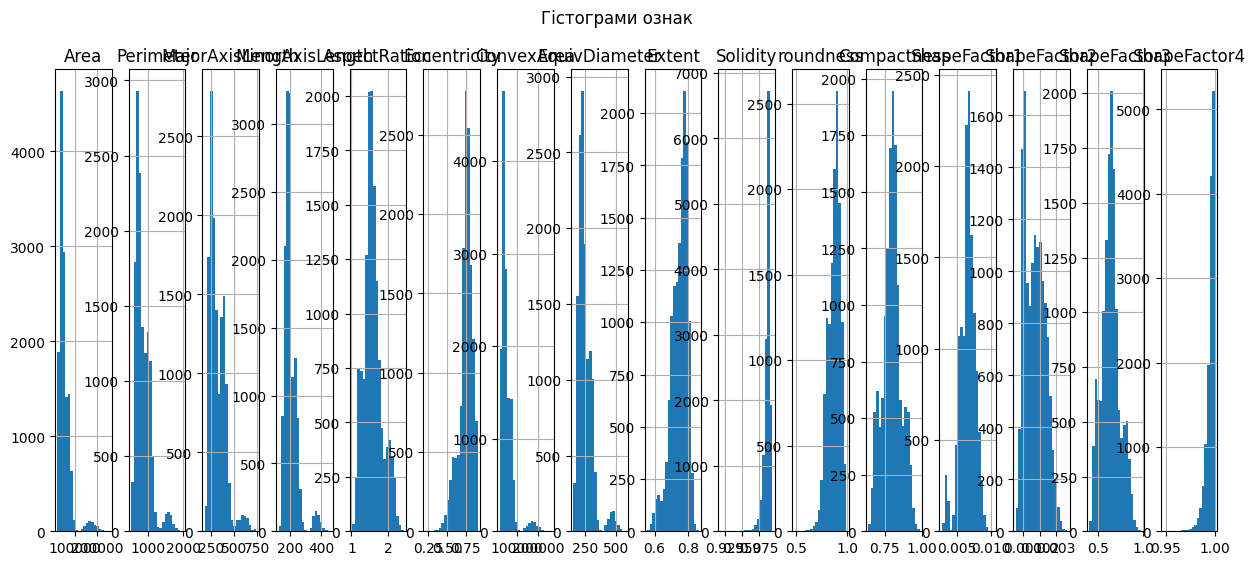

In [8]:
# --- Гістограми розподілу ознак ---
df[feature_cols].hist(bins=20, figsize=(15,6), layout=(1,len(feature_cols)))
plt.suptitle("Гістограми ознак")
plt.show()

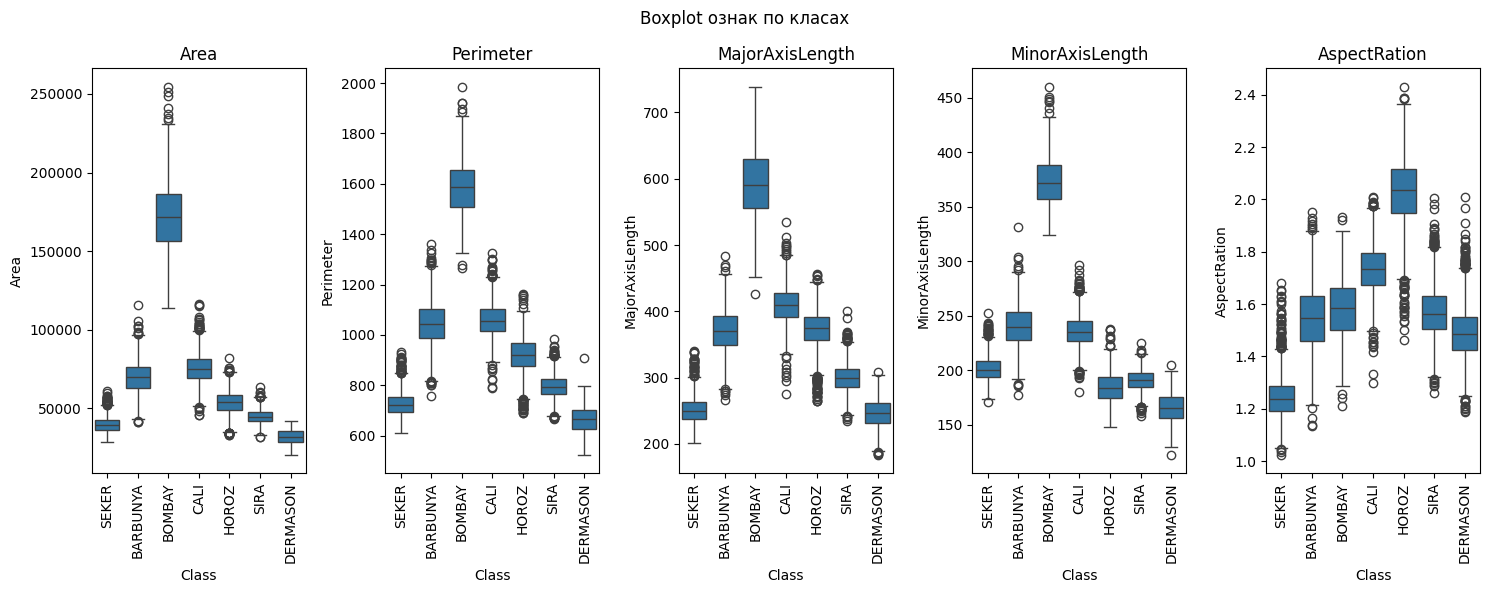

In [10]:
# --- Boxplot ознак відносно цільової змінної ---
plt.figure(figsize=(15,6))
for i, col in enumerate(feature_cols):
    plt.subplot(1, len(feature_cols), i+1)
    sns.boxplot(x=target_col, y=col, data=df)
    plt.xticks(rotation=90)
    plt.title(col)
plt.suptitle("Boxplot ознак по класах")
plt.tight_layout()
plt.show()

In [6]:
from sklearn.preprocessing import StandardScaler

# Вибираємо ознаки та ціль
feature_cols = df.columns[:-1]  # всі колонки, крім target
target_col = df.columns[-1]

X = df[feature_cols]  # ознаки
y = df[target_col]    # цільова змінна

# --- Нормалізація ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Перетворимо назад у DataFrame для зручності
X_scaled_df = pd.DataFrame(X_scaled, columns=feature_cols)

# Додамо колонку target
X_scaled_df[target_col] = y

# Перевірка
print("Перші 5 рядків нормалізованого датасету:")
X_scaled_df.head()


Перші 5 рядків нормалізованого датасету:


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,-0.840749,-1.143319,-1.306598,-0.631153,-1.565053,-2.185720,-0.841451,-1.063341,0.289087,0.367613,1.423867,1.839116,0.680786,2.402173,1.925723,0.838371,SEKER
1,-0.829188,-1.013924,-1.395911,-0.434445,-1.969784,-3.686040,-0.826102,-1.044217,0.697477,-0.462907,0.231054,2.495449,0.367967,3.100893,2.689702,0.771138,SEKER
2,-0.807157,-1.078829,-1.252357,-0.585735,-1.514291,-2.045336,-0.808704,-1.008084,0.578195,0.518417,1.252865,1.764843,0.603129,2.235091,1.841356,0.916755,SEKER
3,-0.785741,-0.977215,-1.278825,-0.439290,-1.741618,-2.742211,-0.773975,-0.973337,0.671260,-2.241767,0.515049,2.081715,0.401718,2.515075,2.204250,-0.197985,SEKER
4,-0.781239,-1.097384,-1.380471,-0.266663,-2.117993,-4.535028,-0.784286,-0.966080,0.476020,0.804772,1.874992,2.765330,0.118268,3.270983,3.013462,0.939640,SEKER


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# X - усі ознаки, y - цільова змінна (клас бобу)
X = df.drop("Class", axis=1)
y = df["Class"]

# поділ на train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# нормалізація (масштабування ознак)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

print("Навчання класифікаторів")
print("--------------------------")

# ----- kNN з підбором k -----
knn_params = {'n_neighbors': list(range(1, 11))}
knn = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5)
knn.fit(X_train, y_train)
print("kNN best params:", knn.best_params_)

# ----- Decision Tree -----
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# ----- SVM з GridSearch для C і gamma -----
svm_params = {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto', 0.01, 0.1], 'kernel': ['rbf']}
svm = GridSearchCV(SVC(), svm_params, cv=5)
svm.fit(X_train, y_train)
print("SVM best params:", svm.best_params_)

# ----- Random Forest -----
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# ----- AdaBoost -----
ab = AdaBoostClassifier(random_state=42)
ab.fit(X_train, y_train)


print("\n--------------------------")
print("Вибір найкращої моделі")
print("--------------------------")

models = {
    'kNN': knn,
    'Decision Tree': dt,
    'SVM': svm,
    'Random Forest': rf,
    'AdaBoost': ab
}

best_acc = 0
best_model_name = None
best_model = None

for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = np.mean(y_pred == y_test)
    print(f"{name} accuracy: {acc:.4f}")
    if acc > best_acc:
        best_acc = acc
        best_model_name = name
        best_model = model

print(f"\nНайкраща модель: {best_model_name} з точністю {best_acc:.4f}")

print("\n--------------------------")
print("Метрики для найкращої моделі")
print("--------------------------")

y_pred_best = best_model.predict(X_test)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_best))

print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred_best))

Навчання класифікаторів
--------------------------
kNN best params: {'n_neighbors': 10}
SVM best params: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

--------------------------
Вибір найкращої моделі
--------------------------
kNN accuracy: 0.9177
Decision Tree accuracy: 0.8920
SVM accuracy: 0.9273
Random Forest accuracy: 0.9207
AdaBoost accuracy: 0.8057

Найкраща модель: SVM з точністю 0.9273

--------------------------
Метрики для найкращої моделі
--------------------------

Classification Report:

              precision    recall  f1-score   support

    BARBUNYA       0.93      0.91      0.92       265
      BOMBAY       1.00      1.00      1.00       104
        CALI       0.94      0.94      0.94       326
    DERMASON       0.91      0.93      0.92       709
       HOROZ       0.96      0.95      0.96       386
       SEKER       0.94      0.96      0.95       406
        SIRA       0.88      0.87      0.87       527

    accuracy                           0.93      2723
   macro 